Adding imports to this section as they are needed

In [112]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import date
import matplotlib.ticker as ticker
import pandas as pd

Will need to add tk for a GUI
GUI has been started in the Main.ipynb
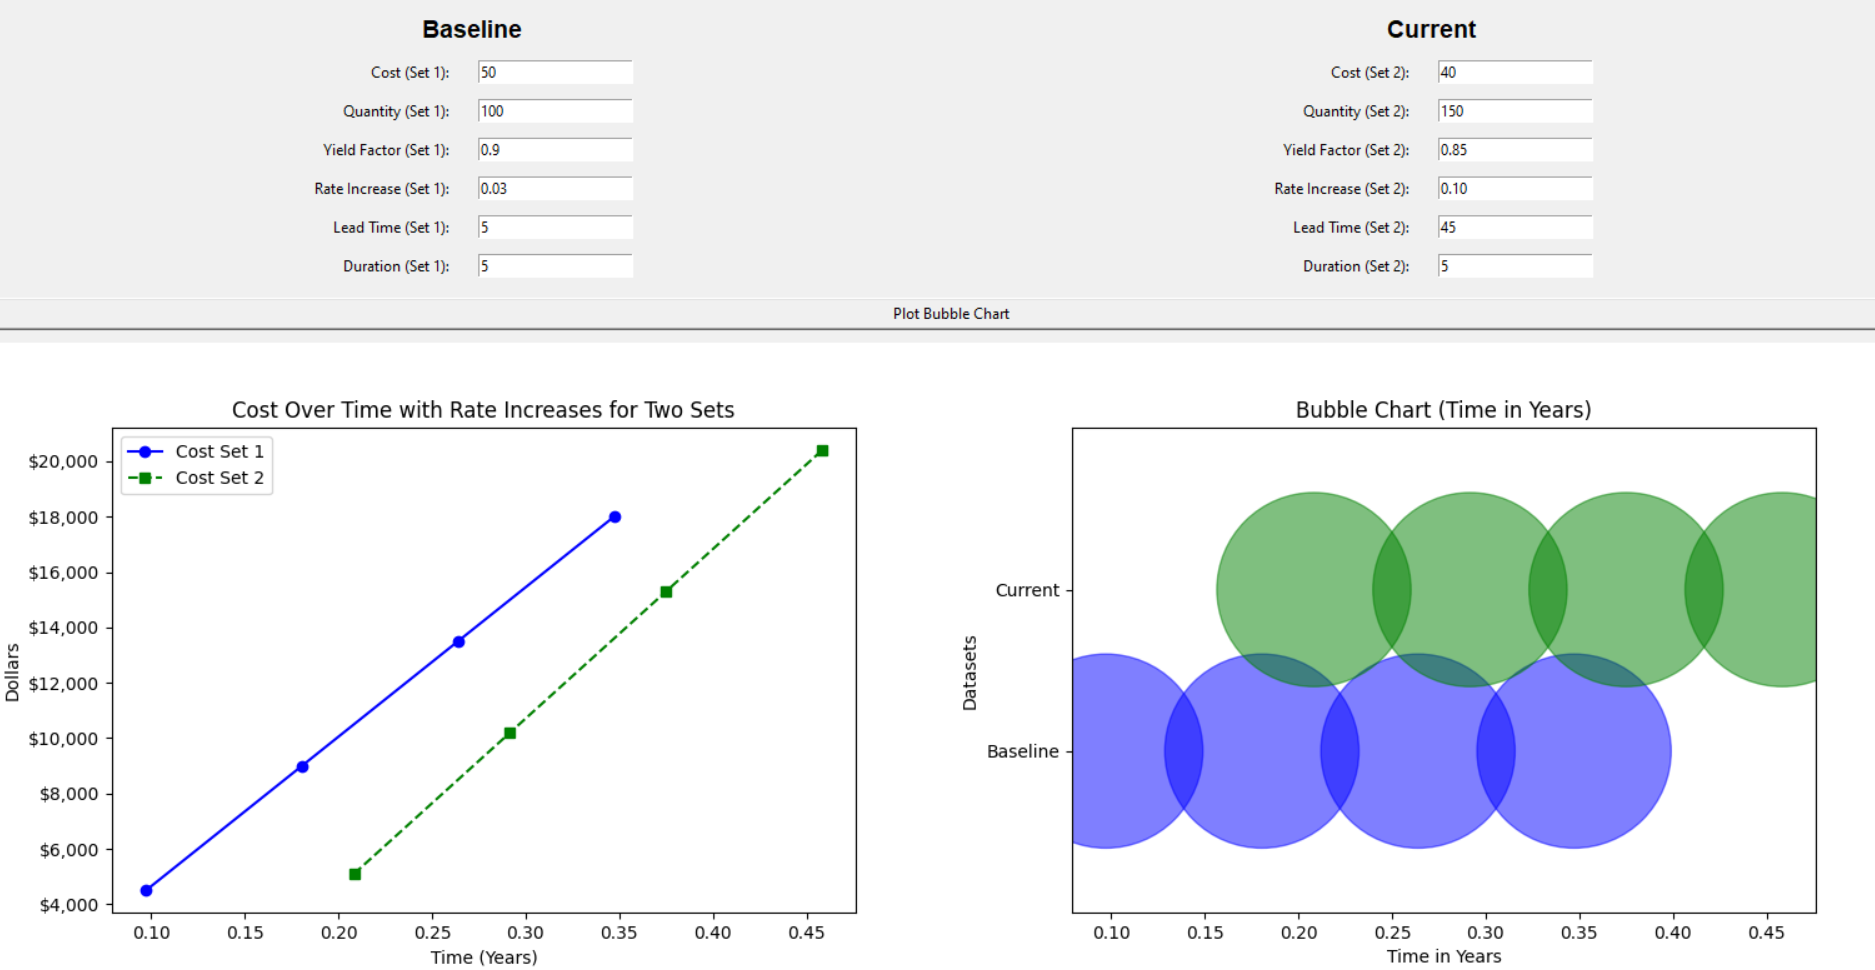

Need a way to modify the dataset still based on user inputs

This is the function to create a plot bubble chart

In [113]:
def plot_bubble_chart(x_value_1, x_value_2, bubble_mag_1, bubble_mag_2, series_name_1, series_name_2, chart_title, x_axis_label):

    '''Plots two datasets in a bubble chart with the magnitude shown as an average
    
    Parameters:
    x_value_1: is the array of x values for the first dataset n/
    x_value_2: is the array of x values for the first dataset
    bubble_mag_1: is the array of values that will be used for the size of the bubbles in the first dataset
    bubble_mag_2: is the array of values that will be used for the size of the bubbles in the second dataset
    series_name_1: is the name of the first dataseries that will be used on the chart
    series_name_2: is the name of the second dataseries that will be used on the chart
    chart_title: is the title of the chart that will display
    x_axis_lable: is the text that will show along the x axis

    Returns:
    None
    '''
    fig, ax = plt.subplots()

    # Calculate total magnitude for each dataset 
    total_mag_1 = np.sum(bubble_mag_1)
    total_mag_2 = np.sum(bubble_mag_2)

    #Calculate a percentage array based on the totals above
    percentage_1 = (bubble_mag_1 / total_mag_1) * 100  
    percentage_2 = (bubble_mag_2 / total_mag_2) * 100  

    # Normalizing the sizes to be proportional to their value
    bubble_size_factor = 500  
    sizes_1 = percentage_1 * bubble_size_factor
    sizes_2 = percentage_2 * bubble_size_factor
    
    y_values_1 = array = np.full(len(x_value_1), 1)
    y_values_2 = array = np.full(len(x_value_2), 2)

    # Plot dataset 1
    scatter1 = ax.scatter(x_value_1, y_values_1, s=sizes_1, c='b', alpha=0.5, label='Cost Set 1')

    # Plot dataset 2
    scatter2 = ax.scatter(x_value_2, y_values_2, s=sizes_2, c='g', alpha=0.5, label='Cost Set 2')

    # Adjust the y-axis limits to add space above and below the data
    ax.set_ylim(0, 3)  # Add space above and below the data

    # Set different datasets
    ax.set_yticks([1, 2])
    plt.xticks(rotation=90)
    ax.set_yticklabels([series_name_1, series_name_2])
        
    # Add labels and title
    ax.set_title(chart_title)
    ax.set_xlabel(x_axis_label)

This is the function to plot a line chart

In [114]:
def plot_line_chart(x_value_1,x_value_2,y_values_1,y_values_2, data_label_1, data_label_2,x_label,y_label,chart_title):

    '''creates a line chart (assumes y is currency and x is a date)'''
    # Create the plot
    fig, ax = plt.subplots()

    # Plot dataset 1
    ax.plot(x_value_1, y_values_1, marker='o', linestyle='-', color='b', label=data_label_1)

    # Plot dataset 2
    ax.plot(x_value_2, y_values_2, marker='s', linestyle='--', color='g', label=data_label_2)

    # Format the y-axis as currency
    ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.0f}'))

    # Adding labels, title, and legend
    plt.title(chart_title)
    plt.xlabel(x_label)
    plt.xticks(rotation=90)
    plt.ylabel(y_label)
    plt.legend()



This is temporary code in order to manually test out the plotting capability. Saving it in case it is needed later on

In [115]:
'''#Run bubble chart example
y_values_1 = [1,5,8,12,2,6,8,0,1,10] #Represents costs
y_values_2 = [2,6,3,11,12,2,6,3,3,9] #Represents costs
x_values_1 = [1,2,3,4,5,6,7,8,9,10] #Represents time
x_values_2 = [3,4,5,6,7,8,9,10,11,12] #Represents time

plot_bubble_chart(x_values_1, x_values_2, y_values_1, y_values_2,"baseline", "current","Time-Phased Work","days")


#Run Line chart example
y_value_cum_1 = np.cumsum(y_values_1) #Represents cummulative costs
y_value_cum_2 = np.cumsum(y_values_2) #Represents cummulative costs

plot_line_chart(x_values_1, x_values_2, y_value_cum_1, y_value_cum_2,"baseline", "current","cost","days","Time-Phased Work")'''

'#Run bubble chart example\ny_values_1 = [1,5,8,12,2,6,8,0,1,10] #Represents costs\ny_values_2 = [2,6,3,11,12,2,6,3,3,9] #Represents costs\nx_values_1 = [1,2,3,4,5,6,7,8,9,10] #Represents time\nx_values_2 = [3,4,5,6,7,8,9,10,11,12] #Represents time\n\nplot_bubble_chart(x_values_1, x_values_2, y_values_1, y_values_2,"baseline", "current","Time-Phased Work","days")\n\n\n#Run Line chart example\ny_value_cum_1 = np.cumsum(y_values_1) #Represents cummulative costs\ny_value_cum_2 = np.cumsum(y_values_2) #Represents cummulative costs\n\nplot_line_chart(x_values_1, x_values_2, y_value_cum_1, y_value_cum_2,"baseline", "current","cost","days","Time-Phased Work")'

This is to import a file, I would like to have this as a user uploadable file in the UX eventually. 

In [116]:


# Import CSV file
df = pd.read_csv('sample data/Cost and Schedule Data.csv')
# TODO: add debugging. check for required column headers and column formatting  


This takes the imported data and applies filters, sorts by date, and creates the arrays needed to plot the data. Currently this is taking in two datasets rather than creating a second dataset. Will need to add a filter to the UX

In [117]:
def prep_import_data(df,filter_column_array,filter_value_array):
    '''modified imported data for use with plot functions. Must have the 
    following columns: Dataset, Build Cost, Need Date
    filter_column_array is an array of column names to be filtered
    filter_value_array is an array of the values to filter corresponding columns by'''
    
    #filter data based on inputs
    filtered_df = df

    #loops through both arrays at the same time
    for col, val in zip(filter_column_array, filter_value_array):
        filtered_df = filtered_df[filtered_df[col]== val]

    #Sort the data by date
    filtered_df.sort_values('Need Date', inplace=True)

    #Create Dataset_1 arrays
    dataset_1 = filtered_df[filtered_df['Dataset'] == "Baseline"] #Represents costs
    y_values_1 = dataset_1['Build Cost']
    x_values_1 = dataset_1['Need Date']
    x_values_fmt_1 = pd.to_datetime(x_values_1,origin='1899-12-30', unit='D')

    #Create Dataset_2 arrays
    dataset_2 = filtered_df[filtered_df['Dataset'] == "Current"] #Represents costs
    y_values_2 = dataset_2['Build Cost']
    x_values_2 = dataset_2['Need Date']
    x_values_fmt_2 = pd.to_datetime(x_values_2,origin='1899-12-30', unit='D')

    #Plot bubble chart
    plot_bubble_chart(x_values_fmt_1, x_values_fmt_2, y_values_1, y_values_2,"baseline", "current","Time-Phased Work","days")


    #Run Line chart 
    y_value_cum_1 = np.cumsum(y_values_1) #Represents cummulative costs
    y_value_cum_2 = np.cumsum(y_values_2) #Represents cummulative costs

    plot_line_chart(x_values_fmt_1, x_values_fmt_2, y_value_cum_1, y_value_cum_2,"baseline", "current","cost","days","Time-Phased Work")

    return x_values_fmt_1, x_values_fmt_2, y_values_1,  y_values_2, y_value_cum_1, y_value_cum_2

In [126]:
def prep_import_data_common_x(df,filter_column_array,filter_value_array):
    '''modified imported data for use with plot functions. Must have the 
    following columns: Dataset, Build Cost, Need Date
    filter_column_array is an array of column names to be filtered
    filter_value_array is an array of the values to filter corresponding columns by'''
    
    #filter data based on inputs
    filtered_df = df

    #loops through both arrays at the same time to create a new dataset based on filters
    for col, val in zip(filter_column_array, filter_value_array):
        filtered_df = filtered_df[filtered_df[col]== val]

    #convert to pandas datetime
    filtered_df['Need Date'] = pd.to_datetime(filtered_df['Need Date'])

    # Sort the data by 'Need Date'
    filtered_df.sort_values('Need Date', inplace=True)

    # Create Dataset arrays for "Baseline" and "Current"
    dataset_1 = filtered_df[filtered_df['Dataset'] == "Baseline"]
    dataset_2 = filtered_df[filtered_df['Dataset'] == "Current"]

    # Extract x (dates) and y (build costs) values for both datasets
    x_values_1 = dataset_1['Need Date']
    y_values_1 = dataset_1['Build Cost']

    x_values_2 = dataset_2['Need Date']
    y_values_2 = dataset_2['Build Cost']

    #create a common x_value
    min_date = min(x_values_1.min(),x_values_2.min())
    max_date = max(x_values_1.max(),x_values_2.max())

    x_values_common = pd.date_range(start=min_date, end=max_date)
    
    #Create dictionary of datasets
    y_values_dict_1 = dict(zip(x_values_1,y_values_1))
    y_values_dict_2 = dict(zip(x_values_2,y_values_2))

    # Align y-values to the common date range, filling missing dates with 0
    y_values_1_aligned = [y_values_dict_1.get(date, 0) for date in x_values_common]
    y_values_2_aligned = [y_values_dict_2.get(date, 0) for date in x_values_common]

    # Calculate cumulative sum of the build costs for both datasets
    y_value_cum_1 = np.cumsum(y_values_1_aligned)
    y_value_cum_2 = np.cumsum(y_values_2_aligned)

    #Plot bubble chart
    plot_bubble_chart(x_values_common, x_values_common, y_values_1, y_values_2,"baseline", "current","Time-Phased Work","days")


    #Run Line chart 
    y_value_cum_1 = np.cumsum(y_values_1) #Represents cummulative costs
    y_value_cum_2 = np.cumsum(y_values_2) #Represents cummulative costs

    plot_line_chart(x_values_common, x_values_common, y_value_cum_1, y_value_cum_2,"baseline", "current","cost","days","Time-Phased Work")

    return x_values_common, x_values_common, y_values_1,  y_values_2, y_value_cum_1, y_value_cum_2

This calculates the EVM data that will be displayed based on a selected date. Need to resize the charts to make room for these calculations

In [127]:
def calculate_EVM(date, x_values_fmt_1, x_values_fmt_2, y_values_1, y_values_2):
        
    #print(x_values_fmt_2.shape)
    #print(y_values_2.shape)
    # Create DataFrame for dataset_1 and dataset_2
    dataset_1 = pd.DataFrame({
        'x_values_fmt_1': x_values_fmt_1,
        'y_values_1': y_values_1
    })
    
    dataset_2 = pd.DataFrame({
        'x_values_fmt_2': x_values_fmt_2,
        'y_values_2': y_values_2
    })


    # Filter the data into past and future datasets
    past_dataset_1 = dataset_1[dataset_1['x_values_fmt_1'] <= date]
    past_dataset_2 = dataset_2[dataset_2['x_values_fmt_2'] <= date]

    future_dataset_1 = dataset_1[dataset_1['x_values_fmt_1'] > date]
    future_dataset_2 = dataset_2[dataset_2['x_values_fmt_2'] > date]

    #EAC
    EAC = np.sum(y_values_2)

    #BAC
    BAC = np.sum(y_values_1)

    #Actuals to date
    actuals = np.sum(past_dataset_2['y_values_2'])

    #Planned Value to Date
    past_planned = np.sum(past_dataset_1['y_values_1'])

    #ETC
    ETC = np.sum(future_dataset_2['y_values_2'])
    
    #Percent Complete
    per_complete = np.divide(ETC,EAC)

    #EV
    EV = np.multiply(per_complete,BAC)

    #CV
    CV = actuals - EV

    #SV
    SV = past_planned - EV


In [128]:
def calculate_EVM_Array(dates,x_values_fmt_1, x_values_fmt_2, y_values_1, y_values_2):

    results = []

    for date in dates:
        result = calculate_EVM(date,x_values_fmt_1, x_values_fmt_2, y_values_1, y_values_2)
        results.append(result)

    return results

Execute The Code

C:\Users\CassieLynn\AppData\Local\Temp\ipykernel_25172\3103321895.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



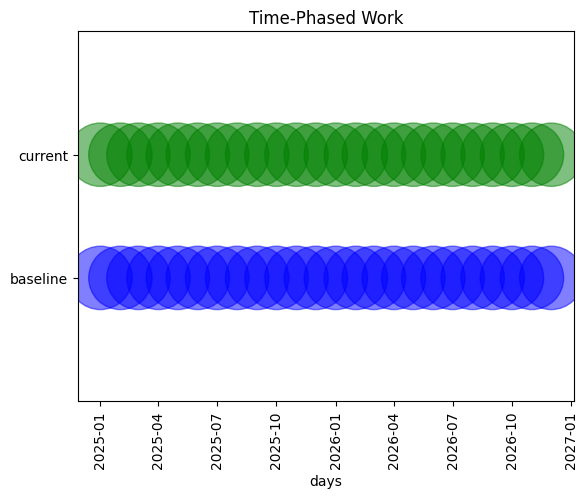

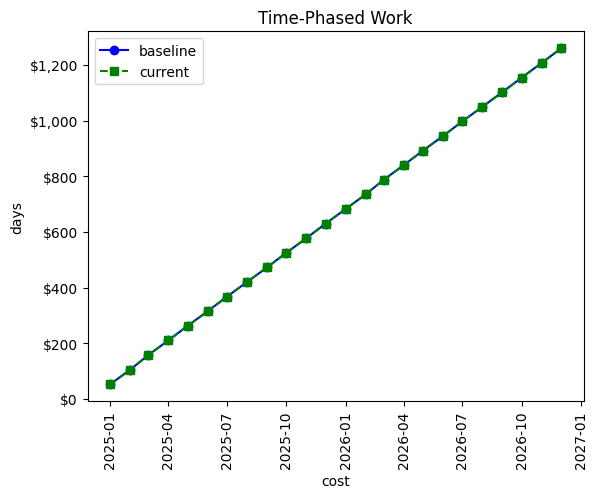

In [129]:
filter_column_array = ['Item']
filter_value_array = [20001]

x_values_fmt_1, x_values_fmt_2, y_values_1,  y_values_2, y_value_cum_1, y_value_cum_2 = prep_import_data(df,filter_column_array,filter_value_array)
today = pd.Timestamp(date.today())
calculate_EVM(today, x_values_fmt_1, x_values_fmt_2, y_values_1, y_values_2)


In [130]:
import plotly.graph_objects as go
import pandas as pd

def plot_line_chart_with_percent_delta(x_value_1, x_value_2, y_values_1, y_values_2, 
                                       data_label_1, data_label_2, x_label, y_label, chart_title):

    # Calculate percent delta
    percent_delta = [(y2 - y1) / y1 * 100 if y1 != 0 else None for y1, y2 in zip(y_values_1, y_values_2)]

    # Calculate BAC
    BAC = max(y_values_1)

    #Calculate EAC
    EAC = max(y_values_2)

    # Create the figure
    fig = go.Figure()

    # Add the first line (hoverinfo='skip' ensures it doesn't show on hover)
    fig.add_trace(go.Scatter(x=x_value_1, 
                             y=y_values_1, 
                             mode='lines', 
                             name=data_label_1, 
                             line=dict(color='blue'),
                             showlegend=False,
                             hoverinfo='skip'))  # Skip hover for this line

    # Add the second line (hoverinfo='skip' ensures it doesn't show on hover)
    fig.add_trace(go.Scatter(x=x_value_2, 
                             y=y_values_2, 
                             mode='lines', 
                             name=data_label_2, 
                             line=dict(color='green', 
                                       dash='dash'),
                             showlegend=False,
                             hoverinfo='skip'))  # Skip hover for this line


    fig.add_annotation(
        x=1.05,  # Position outside the plot area (in paper coordinates)        
        y=y_values_1[-1],
        text=f'BAC ${BAC:,.2f}',
        showarrow=False,
        yref = 'y',
        xref='paper',  # Reference the figure's width, not the data coordinates        
        xanchor="left",  # Align text to the left of the annotation point
        yanchor="middle"
    )

    fig.add_annotation(
        x=1.05,
        y=y_values_2[-1],
        text=f'EAC ${EAC:,.2f}',
        showarrow=False,
        yref = 'y',
        xref='paper',  # Reference the figure's width, not the data coordinates
        xanchor="left",  # Align text to the left of the annotation point
        yanchor="middle"
    )

   # Add a third trace for hover text with the percent delta only
    fig.add_trace(go.Scatter(
        x=x_value_1, 
        y=y_values_1, 
        mode='lines',
        line=dict(color='rgba(0,0,0,0)'), # Set the line color to transparent
        customdata=percent_delta,
        hovertemplate='Date: %{x}<br>Percent Delta: %{customdata:.2f}%<extra></extra>',
        showlegend=False))  # No legend entry for this trace

    # Customize the layout
    fig.update_layout(
        title=dict(
            text=chart_title,
            x=0.5,
            xanchor='center',
            yanchor='top'
        ),

        hovermode='x unified',
        yaxis_tickprefix='$',
        yaxis_tickformat=',.0f',
        showlegend=False,
        plot_bgcolor='white',  # Set the plot background to white
        paper_bgcolor='white',  # Set the overall chart background to white
        xaxis=dict(showgrid=True, 
                   gridcolor='lightgray'),  # Set grid lines for better visibility
        yaxis=dict(showgrid=True, 
                   gridcolor='lightgray'),
        margin=dict(l=80, 
                    r=150, 
                    t=50, 
                    b=50)  # Adjust 'r' for right margin size (150px in this example)
    )



    # Show the plot
    fig.show()

# Example usage with mock data
x_value_1 = pd.date_range(start='2023-01-01', periods=12, freq='ME')  # Example date range for dataset 1
x_value_2 = pd.date_range(start='2023-01-01', periods=12, freq='ME')  # Example date range for dataset 2
y_values_1 = [1000, 1200, 1500, 1400, 1300, 1700, 1600, 1800, 2100, 1900, 2200, 2400]  # Mock y-values for dataset 1
y_values_2 = [800, 900, 1000, 1100, 1200, 1000, 900, 1300, 1200, 1100, 1500, 1400]  # Mock y-values for dataset 2

plot_line_chart_with_percent_delta(x_value_1, x_value_2, y_values_1, y_values_2, 
                                   'Dataset 1', 'Dataset 2', 'Date', 'Currency', 
                                   'Line Chart with Percent Delta')
